# California Housing Dataset
- Usando arquitetura wide & deep, que liga todas as partes das entradas diretamente às saídas. O objetivo é preservar padrões simples por não forças os dados a atravessarem todas as camadas da rede.
- Usa a Functional API do Keras.

## Imports

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [3]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data,
    housing.target
)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full,
    y_train_full
)

## Scaling

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test=scaler.transform(X_test)

## NN Architecture

In [12]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model=keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="mean_squared_error", optimizer="adam")

In [13]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        930 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         39 │ concatenate_2[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

## Train

In [14]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8945 - val_loss: 0.6948
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4800 - val_loss: 0.6344
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4443 - val_loss: 0.7026
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3839 - val_loss: 0.5230
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4031 - val_loss: 0.6153
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3756 - val_loss: 0.3788
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3615 - val_loss: 0.6243
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3560 - val_loss: 0.4059
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3325 - val_loss: 0.3605
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3368 - val_loss: 0.3669
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3324 - val_loss: 0.3514
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

## Evaluate

In [15]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3119
0.31642889976501465


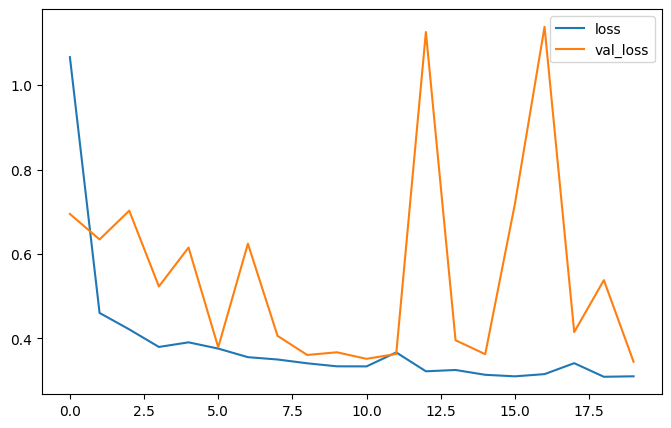

In [16]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid=True
# plt.gca().set_ylim(0,1)
plt.show()

## Predict

In [17]:
X_new = X_test[:1]
y_pred=model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [18]:
y_pred

array([[2.3194416]], dtype=float32)

In [19]:
y_test[:1]

array([2.077])